# Handwritten Digit Recognition Using Convolutional Neural Networks on the MNIST Dataset

This project involves building a deep learning model to recognize handwritten digits (0-9) using the MNIST dataset. The dataset consists of 28x28 pixel grayscale images, each labeled with a digit. Using a Convolutional Neural Network (CNN), the model is trained to accurately classify each image into its respective digit class. The CNN architecture includes convolutional and pooling layers to extract features from the images, followed by dense layers for classification. After training, the model achieves high accuracy on the test set and can recognize handwritten digits with remarkable precision, demonstrating the power of CNNs for image classification tasks.

# Import Libraries

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load and Explore Dataset

In [3]:
df = pd.read_csv(r'C:\Users\user\Desktop\CognoRise Infotech ML Intern\data\mnist_digit_recognizer_data.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print("Dataset columns:", df.columns)

Dataset columns: Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [7]:
print("Numbers of rows and columns:", df.shape)

Numbers of rows and columns: (42000, 785)


# Data Preprocessing

In [9]:
# separate the label and the pixel values
X = df.drop('label', axis=1).values # features
y = df['label'].values # labels

In [10]:
# normalize pixel values (0-255) to a range of 0-1
X = X / 255.0

In [11]:
# reshape features to fit the input shape of a CNN (28x28x1)
X = X.reshape(-1, 28, 28, 1)

In [13]:
# convert labels to categorical (one-hot encoding)
y = to_categorical(y, num_classes=10)

In [14]:
# split the data into trainin and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build CNN Model

In [15]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 output neurons for 10 classes (digits 0-9)
])

C:\Users\user\Desktop\CognoRise Infotech ML Intern\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
print("Model compiled successfully.")

Model compiled successfully.


# Train Model

In [17]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)
print("Model training completed.")

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8801 - loss: 0.3963 - val_accuracy: 0.9820 - val_loss: 0.0606
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9831 - loss: 0.0524 - val_accuracy: 0.9846 - val_loss: 0.0547
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9899 - loss: 0.0351 - val_accuracy: 0.9877 - val_loss: 0.0400
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9929 - loss: 0.0225 - val_accuracy: 0.9870 - val_loss: 0.0372
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9953 - loss: 0.0166 - val_accuracy: 0.9889 - val_loss: 0.0383
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9957 - loss: 0.0137 - val_accuracy: 0.9856 - val_loss: 0.0496
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9960 - loss: 0.0105 - val_accuracy: 0.9839 - val_loss: 0.0563
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9977 - loss: 0.008

# Evaluate Model

In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9852 - loss: 0.0522
Test Accuracy: 98.71%


# Training Results

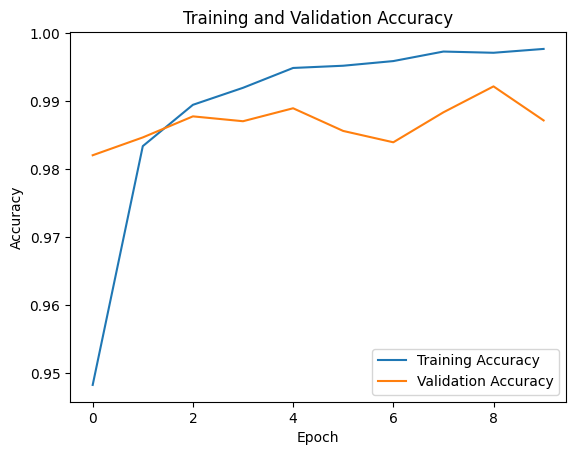

In [19]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Make Predictions

In [20]:
# get predictions for a sample of test images
predictions = np.argmax(model.predict(X_test[:10]), axis=-1)
actuals = np.argmax(y_test[:10], axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


In [23]:
print("Predictions:", predictions)
print("Actual labels:", actuals)

Predictions: [8 1 9 9 8 6 2 2 7 1]
Actual labels: [8 1 9 9 8 6 2 2 7 1]


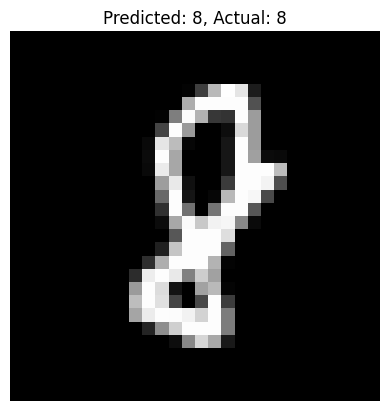

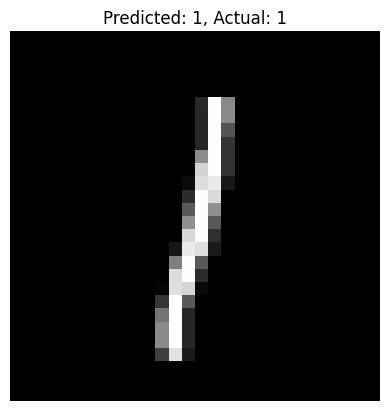

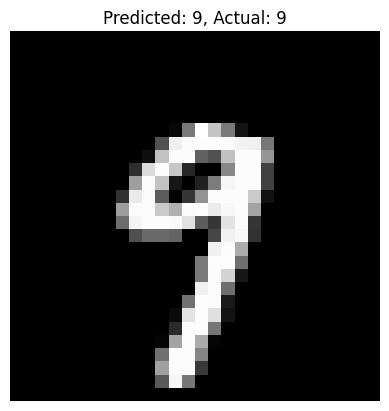

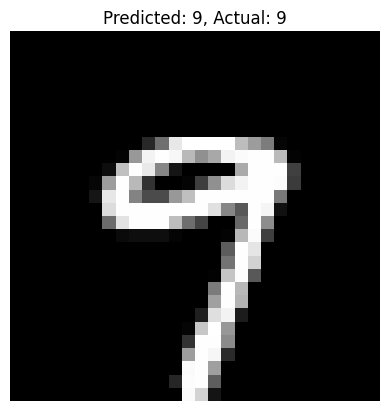

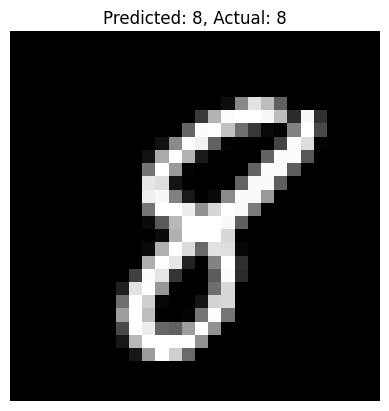

In [24]:
# display some sample images with predicted labels
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predictions[i]}, Actual: {actuals[i]}")
    plt.axis('off')
    plt.show()